# The Battle of Neighborhoods - Week 2 - Code
___

#### Importing all the necessary libraries: <a name='libraries'></a>

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import folium
import json
from pandas.io.json import json_normalize
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
from geopy.geocoders import Nominatim
import requests
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

### Exploratory Data Analysis <a name='eda'></a>
___

I have already collected all the data and merged them under 1 CSV file: **'demographics.csv'**

In [2]:
df_all = pd.read_csv('demographics.csv')
df_all.head()

,Borough,District,Area (sqr km),Population (2017),Change/Year (%),Males (%),Females (%),Avg Mnthly Earnings M,Avg Mnthly Earnings F,Reg Unempl Rate M (%),Reg Unempl Rate F (%),Monthly Cost per household member Bratislava,Latitude,Longitude
0,Čunovo,D5,18.60,1447,5.59,50.3,49.7,1432,1168,1.85,2.28,443.53,48.029722,17.198889
1,Devín,D4,14.00,1538,5.26,50.7,49.3,1424,1181,2.21,3.02,443.53,48.173889,16.983333
2,Devínska Nová Ves,D4,24.20,15940,0.31,48.9,51.1,1424,1181,2.21,3.02,443.53,48.209444,16.972778
3,Dúbravka,D4,8.65,33324,0.33,46.4,53.6,1424,1181,2.21,3.02,443.53,48.186667,17.037222
4,Jarovce,D5,21.30,2200,6.64,50.0,50.0,1432,1168,1.85,2.28,443.53,48.065278,17.113333


**Calculate the population for 2018 and population density**

In [3]:
df_all['Population (2018)'] = (df_all['Population (2017)'] * (df_all['Change/Year (%)']/100) + df_all['Population (2017)']).astype(int)
df_all['Density'] = (df_all['Population (2018)'] / df_all['Area (sqr km)']).astype(int)
df_all = df_all.drop('Monthly Cost per household member Bratislava', axis=1) # We will not use 'Monthly Cost per household member Bratislava' as is too general
df_all = df_all.drop('Population (2017)', axis=1)
df_all.head()

,Borough,District,Area (sqr km),Change/Year (%),Males (%),Females (%),Avg Mnthly Earnings M,Avg Mnthly Earnings F,Reg Unempl Rate M (%),Reg Unempl Rate F (%),Latitude,Longitude,Population (2018),Density
0,Čunovo,D5,18.60,5.59,50.3,49.7,1432,1168,1.85,2.28,48.029722,17.198889,1527,82
1,Devín,D4,14.00,5.26,50.7,49.3,1424,1181,2.21,3.02,48.173889,16.983333,1618,115
2,Devínska Nová Ves,D4,24.20,0.31,48.9,51.1,1424,1181,2.21,3.02,48.209444,16.972778,15989,660
3,Dúbravka,D4,8.65,0.33,46.4,53.6,1424,1181,2.21,3.02,48.186667,17.037222,33433,3865
4,Jarovce,D5,21.30,6.64,50.0,50.0,1432,1168,1.85,2.28,48.065278,17.113333,2346,110


**Check the boroughs with the highest population**

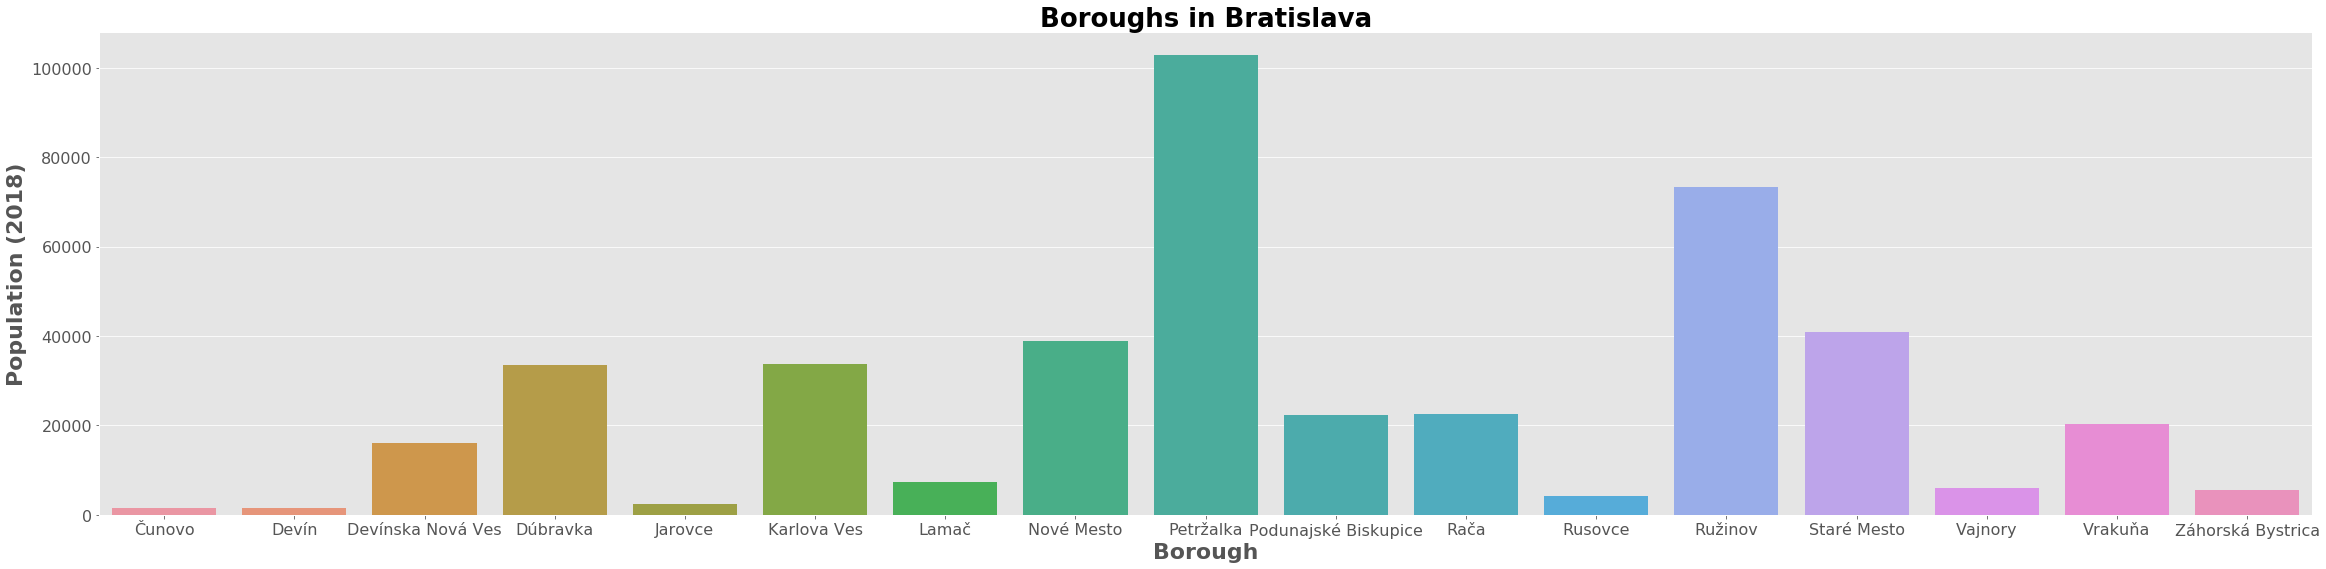

In [5]:
plt.figure(figsize=(32,8))
plt.title('Boroughs in Bratislava', fontsize=26, fontweight='bold')
plt.xticks(size=16)
plt.yticks(size=16)
plt.xlabel('Borough', fontsize=22, fontweight='bold')
plt.ylabel('Population 2018', fontsize=22, fontweight='bold')
plt.tight_layout()
sns.barplot(x='Borough', y ='Population (2018)', data=df_all)
plt.show()

In [7]:
df_pop = df_all.sort_values('Population (2018)',ascending=False)
df_pop[['Borough','Population (2018)']].head()

,Borough,Population (2018)
8,Petržalka,102797
12,Ružinov,73365
13,Staré Mesto,40914
7,Nové Mesto,38820
5,Karlova Ves,33730


**Discover the Districts with the highest average monthly salary for men:** 

In [9]:
df_salary = df_all.sort_values('Avg Mnthly Earnings M', ascending=False)
df_salary[['District','Borough','Avg Mnthly Earnings M']].head(10)

,District,Borough,Avg Mnthly Earnings M
13,D1,Staré Mesto,1658
9,D2,Podunajské Biskupice,1537
15,D2,Vrakuňa,1537
12,D2,Ružinov,1537
14,D3,Vajnory,1449
7,D3,Nové Mesto,1449
10,D3,Rača,1449
0,D5,Čunovo,1432
11,D5,Rusovce,1432
8,D5,Petržalka,1432


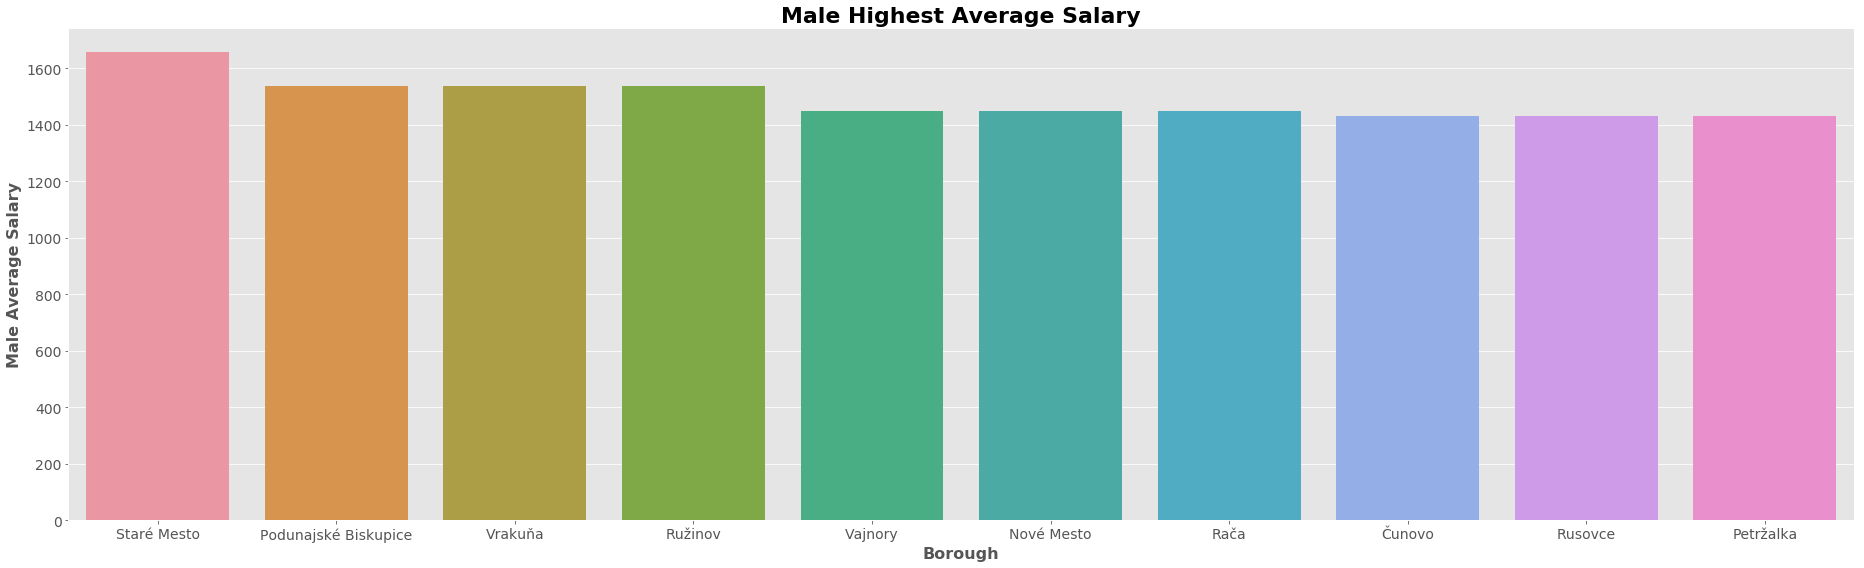

In [34]:
plt.figure(figsize=(26,8))
sns.barplot(x='Borough', y ='Avg Mnthly Earnings M', data=df_salary.head(10))
plt.xlabel('Borough', fontsize=16, fontweight='bold')
plt.xticks(size=14)
plt.ylabel('Male Average Salary', fontsize=16, fontweight='bold')
plt.yticks(size=14)
plt.title('Male Highest Average Salary', fontsize=22, fontweight='bold')
plt.tight_layout()
plt.show()

**Discover the Districts with the highest average monthly salary for women:** 

In [10]:
df_salary2 = df_all.sort_values('Avg Mnthly Earnings F', ascending=False)
df_salary2[['District','Borough','Avg Mnthly Earnings F']].head(10)

,District,Borough,Avg Mnthly Earnings F
13,D1,Staré Mesto,1284
15,D2,Vrakuňa,1266
9,D2,Podunajské Biskupice,1266
12,D2,Ružinov,1266
16,D4,Záhorská Bystrica,1181
2,D4,Devínska Nová Ves,1181
3,D4,Dúbravka,1181
5,D4,Karlova Ves,1181
6,D4,Lamač,1181
1,D4,Devín,1181


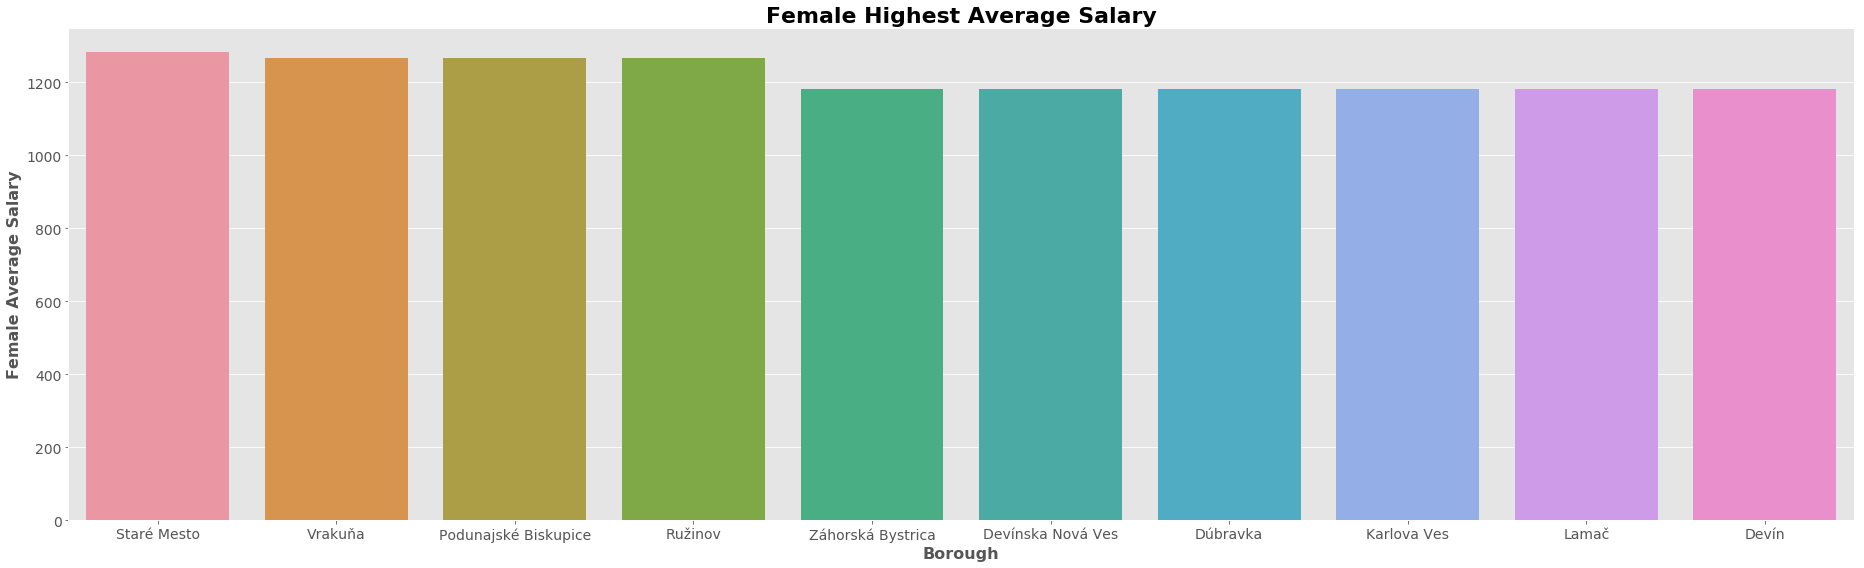

In [33]:
plt.figure(figsize=(26,8))
sns.barplot(x='Borough', y ='Avg Mnthly Earnings F', data=df_salary2.head(10))
plt.xlabel('Borough', fontsize=16, fontweight='bold')
plt.xticks(size=14)
plt.ylabel('Female Average Salary', fontsize=16, fontweight='bold')
plt.yticks(size=14)
plt.title('Female Highest Average Salary', fontsize=22, fontweight='bold')
plt.tight_layout()
plt.show()

**Max Males Population:**

In [17]:
df_maxM = df_all.sort_values('Males (%)', ascending=False)
df_maxM[['Borough','Males (%)']].head(6)

,Borough,Males (%)
1,Devín,50.7
0,Čunovo,50.3
4,Jarovce,50.0
14,Vajnory,49.8
16,Záhorská Bystrica,49.0
2,Devínska Nová Ves,48.9


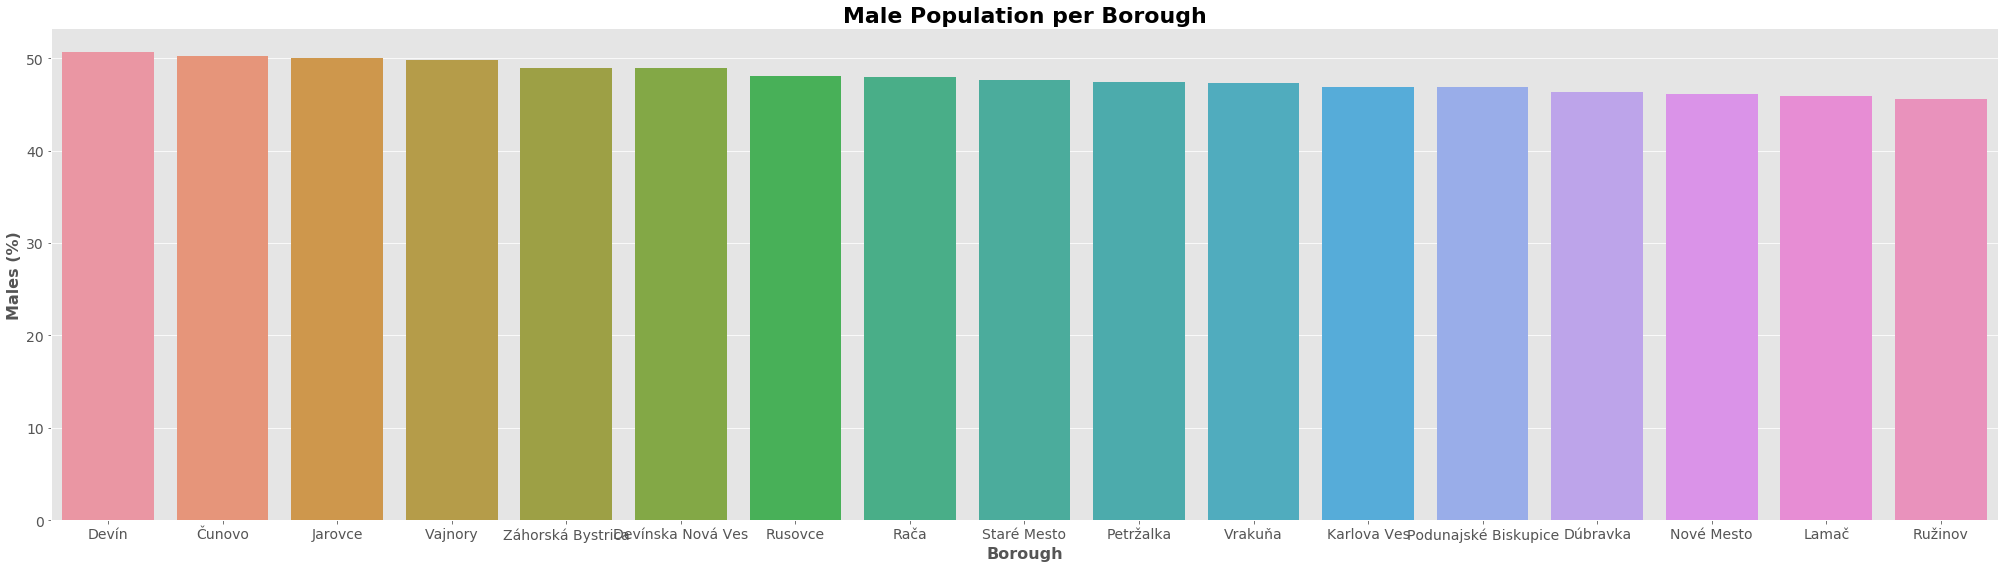

In [30]:
plt.figure(figsize=(28,8))
sns.barplot(x='Borough', y ='Males (%)', data=df_maxM)
plt.xlabel('Borough', fontsize=16, fontweight='bold')
plt.xticks(size=14)
plt.ylabel('Males (%)', fontsize=16, fontweight='bold')
plt.yticks(size=14)
plt.title('Male Population per Borough', fontsize=22, fontweight='bold')
plt.tight_layout()
plt.show()

**Max Females Population:**

In [18]:
df_maxF = df_all.sort_values('Females (%)', ascending=False)
df_maxF[['Borough','Females (%)']].head(6)

,Borough,Females (%)
12,Ružinov,54.4
6,Lamač,54.2
7,Nové Mesto,53.9
3,Dúbravka,53.6
5,Karlova Ves,53.1
9,Podunajské Biskupice,53.1


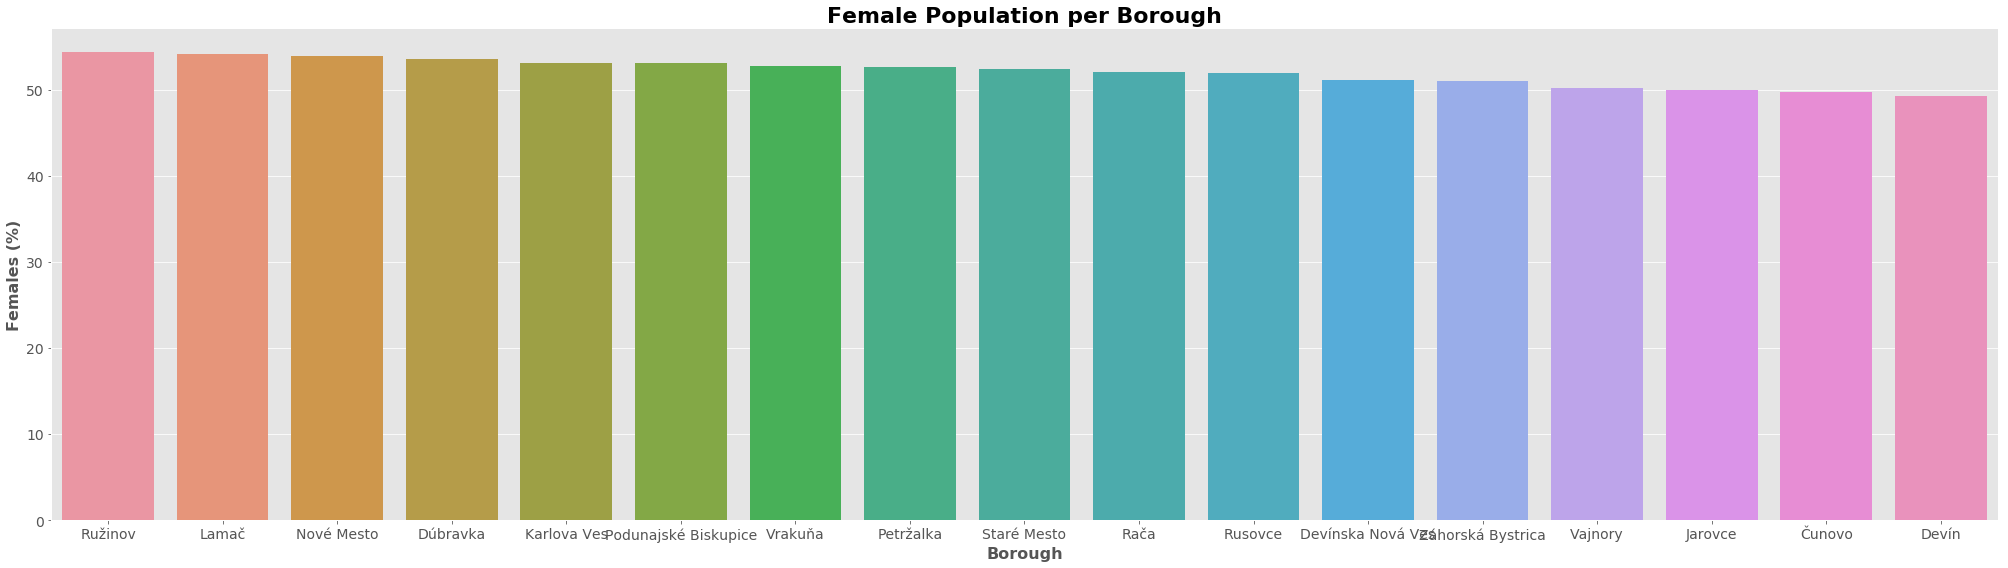

In [29]:
plt.figure(figsize=(28,8))
sns.barplot(x='Borough', y ='Females (%)', data=df_maxF)
plt.xlabel('Borough', fontsize=16, fontweight='bold')
plt.xticks(size=14)
plt.ylabel('Females (%)', fontsize=16, fontweight='bold')
plt.yticks(size=14)
plt.title('Female Population per Borough', fontsize=22, fontweight='bold')
plt.tight_layout()
plt.show()

**Check which Boroughs have the lowest Unemployment Rate for Males:**

In [38]:
df_unemplM = df_all.sort_values('Reg Unempl Rate M (%)', ascending=True)
df_unemplM[['District','Borough','Reg Unempl Rate M (%)']].head(15)

,District,Borough,Reg Unempl Rate M (%)
0,D5,Čunovo,1.85
11,D5,Rusovce,1.85
4,D5,Jarovce,1.85
8,D5,Petržalka,1.85
2,D4,Devínska Nová Ves,2.21
5,D4,Karlova Ves,2.21
6,D4,Lamač,2.21
1,D4,Devín,2.21
3,D4,Dúbravka,2.21
16,D4,Záhorská Bystrica,2.21


**Check which Boroughs have the lowest Unemployment Rate for Females:**

In [39]:
df_unemplF = df_all.sort_values('Reg Unempl Rate F (%)', ascending=True)
df_unemplF[['District','Borough','Reg Unempl Rate F (%)']].head(15)

,District,Borough,Reg Unempl Rate F (%)
0,D5,Čunovo,2.28
11,D5,Rusovce,2.28
4,D5,Jarovce,2.28
8,D5,Petržalka,2.28
13,D1,Staré Mesto,2.91
2,D4,Devínska Nová Ves,3.02
5,D4,Karlova Ves,3.02
6,D4,Lamač,3.02
1,D4,Devín,3.02
3,D4,Dúbravka,3.02


### Analyze all venues in Bratislava:

In [41]:
df = df_all[['District', 'Borough', 'Latitude', 'Longitude']]
df.head()

,District,Borough,Latitude,Longitude
0,D5,Čunovo,48.029722,17.198889
1,D4,Devín,48.173889,16.983333
2,D4,Devínska Nová Ves,48.209444,16.972778
3,D4,Dúbravka,48.186667,17.037222
4,D5,Jarovce,48.065278,17.113333


**Create User Agent:**

In [42]:
address = 'Bratislava, Slovakia'

geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geo coordinate of Bratislava: {}, {}.'.format(latitude, longitude))

The geo coordinate of Bratislava: 48.1516988, 17.1093063.


**Create Map of Bratislava:**

In [43]:
map_bratislava = folium.Map(location=[latitude, longitude], zoom_start=12)

**Add markers on the Map:**

In [44]:
for lat, lng, district, borough in zip(df['Latitude'], df['Longitude'], df['District'], df['Borough']):
    label = '{}, {}'.format(borough, district)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_bratislava)  
    
map_bratislava

In [45]:
CLIENT_ID = 'PI10MOXK5YPW3KFUGOS2UAQRVX502X3ZMNFBRX1QREL3NFFO' # your Foursquare ID
CLIENT_SECRET = 'VLXOINWKTPXCADY2UFT2DWCWG4IUAUMYP5N5HAFBKOMYZZ15' # your Foursquare Secret
VERSION = '20190607' # Foursquare API version

**Calculate Borough *Latitude* and *Longitude* :**

In [46]:
neighborhood_latitude = df.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = df.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = df.loc[0, 'Borough'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Čunovo are 48.029722, 17.198889.


**Get request URL:**

In [47]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 3000 # define radius
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=PI10MOXK5YPW3KFUGOS2UAQRVX502X3ZMNFBRX1QREL3NFFO&client_secret=VLXOINWKTPXCADY2UFT2DWCWG4IUAUMYP5N5HAFBKOMYZZ15&v=20190607&ll=48.029722,17.198889&radius=3000&limit=100'

**Save our results:**

In [48]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5d14fc36db1d81002c1f6b74'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Bratislava',
  'headerFullLocation': 'Bratislava',
  'headerLocationGranularity': 'city',
  'totalResults': 18,
  'suggestedBounds': {'ne': {'lat': 48.05672202700003,
    'lng': 17.239187790064115},
   'sw': {'lat': 48.00272197299997, 'lng': 17.158590209935888}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '58ce5fae9398ab66751e7dab',
       'name': 'Attila Čunovska Čarda',
       'location': {'address': 'Petržalská',
        'lat': 48.027035,
        'lng': 17.196486,
        'labeledLatLngs': [{'label': 'display',
          'lat': 48.027035,
          'lng': 17.19648

In [49]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [50]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Attila Čunovska Čarda,Hungarian Restaurant,48.027035,17.196486
1,Danubiana Meulensteen Art Museum,Art Museum,48.035088,17.231496
2,Areál Divoká voda,Canal,48.031133,17.229937
3,Bufet Nová obrátka,Snack Place,48.028025,17.206530
4,Divoká voda,Hotel,48.031321,17.229763


**Create function in order to repeat the same process for all Boroughs:**

In [51]:
def getNearbyVenues(names, latitudes, longitudes, radius=3000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Borough', 
                  'Borough Latitude', 
                  'Borough Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

**All Bratislava venues:**

In [52]:
bratislava_venues = getNearbyVenues(names=df['Borough'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Čunovo
Devín
Devínska Nová Ves
Dúbravka
Jarovce
Karlova Ves
Lamač
Nové Mesto
Petržalka
Podunajské Biskupice
Rača
Rusovce
Ružinov
Staré Mesto
Vajnory
Vrakuňa
Záhorská Bystrica


In [53]:
print(bratislava_venues.shape)
bratislava_venues.head()

(867, 7)


,Borough,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Čunovo,48.029722,17.198889,Attila Čunovska Čarda,48.027035,17.196486,Hungarian Restaurant
1,Čunovo,48.029722,17.198889,Danubiana Meulensteen Art Museum,48.035088,17.231496,Art Museum
2,Čunovo,48.029722,17.198889,Areál Divoká voda,48.031133,17.229937,Canal
3,Čunovo,48.029722,17.198889,Bufet Nová obrátka,48.028025,17.206530,Snack Place
4,Čunovo,48.029722,17.198889,Divoká voda,48.031321,17.229763,Hotel


**Venues for each Borough:**

In [54]:
bratislava_venues.groupby('Borough').count()

,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Borough,,,,,,
Devín,16,16,16,16,16,16
Devínska Nová Ves,27,27,27,27,27,27
Dúbravka,60,60,60,60,60,60
Jarovce,19,19,19,19,19,19
Karlova Ves,63,63,63,63,63,63
Lamač,63,63,63,63,63,63
Nové Mesto,100,100,100,100,100,100
Petržalka,100,100,100,100,100,100
Podunajské Biskupice,31,31,31,31,31,31


**Unique venues:**

In [55]:
print('There are {} uniques categories.'.format(len(bratislava_venues['Venue Category'].unique())))

There are 175 uniques categories.


**One Hot encoding:**

In [56]:
bratislava_onehot = pd.get_dummies(bratislava_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
bratislava_onehot['Borough'] = bratislava_venues['Borough'] 

# move neighborhood column to the first column
fixed_columns = [bratislava_onehot.columns[-1]] + list(bratislava_onehot.columns[:-1])
bratislava_onehot = bratislava_onehot[fixed_columns]

bratislava_onehot.head()

,Borough,Airport,Airport Service,Airport Terminal,Art Gallery,Art Museum,Art Studio,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Baby Store,Bakery,Bar,Baseball Stadium,Beach,Beer Bar,Beer Garden,Bike Shop,Bike Trail,Bistro,Bookstore,Border Crossing,Botanical Garden,Bowling Alley,Brewery,Buffet,Burger Joint,Burrito Place,Bus Stop,Café,Campground,Canal,Casino,Castle,Chinese Restaurant,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Residence Hall,Concert Hall,Creperie,Czech Restaurant,Design Studio,Dessert Shop,Diner,Dive Bar,Dive Spot,Dog Run,Donut Shop,Drugstore,Duty-free Shop,Eastern European Restaurant,Electronics Store,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Forest,Fountain,French Restaurant,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Gastropub,Go Kart Track,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Health Food Store,Historic Site,Hockey Arena,Hockey Field,Hot Dog Joint,Hotel,Hotel Bar,Hungarian Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Italian Restaurant,Japanese Restaurant,Lake,Laser Tag,Lighthouse,Liquor Store,Lounge,Martial Arts Dojo,Massage Studio,Memorial Site,Mountain,Movie Theater,Multiplex,Museum,Music Venue,Neighborhood,New American Restaurant,Nudist Beach,Opera House,Optical Shop,Outdoor Sculpture,Paella Restaurant,Park,Pastry Shop,Pedestrian Plaza,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Pool,Pub,Recreation Center,Restaurant,River,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Shopping Mall,Skating Rink,Ski Shop,Slovak Restaurant,Snack Place,Soccer Field,Social Club,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Squash Court,Steakhouse,Street Food Gathering,Supermarket,Surf Spot,Sushi Restaurant,Taco Place,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Tourist Information Center,Toy / Game Store,Track,Trail,Train,Train Station,Tram Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Vineyard,Wine Bar,Wine Shop,Yoga Studio,Zoo
0,Čunovo,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Čunovo,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Čunovo,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Čunovo,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Čunovo,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [57]:
bratislava_onehot.shape

(867, 176)

**Calculate Mean Frequency:**

In [58]:
bratislava_grouped = bratislava_onehot.groupby('Borough').mean().reset_index()
bratislava_grouped

,Borough,Airport,Airport Service,Airport Terminal,Art Gallery,Art Museum,Art Studio,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Baby Store,Bakery,Bar,Baseball Stadium,Beach,Beer Bar,Beer Garden,Bike Shop,Bike Trail,Bistro,Bookstore,Border Crossing,Botanical Garden,Bowling Alley,Brewery,Buffet,Burger Joint,Burrito Place,Bus Stop,Café,Campground,Canal,Casino,Castle,Chinese Restaurant,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Residence Hall,Concert Hall,Creperie,Czech Restaurant,Design Studio,Dessert Shop,Diner,Dive Bar,Dive Spot,Dog Run,Donut Shop,Drugstore,Duty-free Shop,Eastern European Restaurant,Electronics Store,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Forest,Fountain,French Restaurant,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Gastropub,Go Kart Track,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Health Food Store,Historic Site,Hockey Arena,Hockey Field,Hot Dog Joint,Hotel,Hotel Bar,Hungarian Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Italian Restaurant,Japanese Restaurant,Lake,Laser Tag,Lighthouse,Liquor Store,Lounge,Martial Arts Dojo,Massage Studio,Memorial Site,Mountain,Movie Theater,Multiplex,Museum,Music Venue,Neighborhood,New American Restaurant,Nudist Beach,Opera House,Optical Shop,Outdoor Sculpture,Paella Restaurant,Park,Pastry Shop,Pedestrian Plaza,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Pool,Pub,Recreation Center,Restaurant,River,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Shopping Mall,Skating Rink,Ski Shop,Slovak Restaurant,Snack Place,Soccer Field,Social Club,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Squash Court,Steakhouse,Street Food Gathering,Supermarket,Surf Spot,Sushi Restaurant,Taco Place,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Tourist Information Center,Toy / Game Store,Track,Trail,Train,Train Station,Tram Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Vineyard,Wine Bar,Wine Shop,Yoga Studio,Zoo
0,Devín,0.000,0.000,0.000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.062500,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.062500,0.125000,0.000000,0.000000,0.000000,0.0625,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.00,0.062500,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.062500,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.062500,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.0625,0.00,0.000000,0.000000,0.000000,0.000,0.0625,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.062500,0.00,0.00,0.00,0.00,0.00,0.000000,0.000000,0.062500,0.000000,0.000000,0.000000,0.000000,0.00,0.062500,0.0625,0.00,0.000000,0.00,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Devínska Nová Ves,0.000,0.000,0.000,0.00,0.000000,0.00,0.000000,0.037037,0.000000,0.000000,0.000000,0.000000,0.037037,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.037037,0.111111,0.000000,0.000000,0.000000,0.0000,0.037037,0.00,0.000000,0.000000,0.000000,0.0

**% most common Venues for each Borough:**

In [59]:
num_top_venues = 5

for hood in bratislava_grouped['Borough']:
    print("----"+hood+"----")
    temp = bratislava_grouped[bratislava_grouped['Borough'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Devín----
            venue  freq
0  Scenic Lookout  0.12
1            Café  0.12
2           River  0.06
3          Castle  0.06
4      Restaurant  0.06


----Devínska Nová Ves----
            venue  freq
0     Beer Garden  0.11
1      Restaurant  0.11
2     Pizza Place  0.11
3            Café  0.11
4  Scenic Lookout  0.07


----Dúbravka----
         venue  freq
0  Supermarket  0.07
1         Pool  0.07
2   Restaurant  0.07
3         Café  0.07
4  Pizza Place  0.05


----Jarovce----
                venue  freq
0     Harbor / Marina  0.11
1  Italian Restaurant  0.11
2                Park  0.11
3        Intersection  0.05
4              Buffet  0.05


----Karlova Ves----
                  venue  freq
0                  Park  0.06
1            Restaurant  0.06
2                  Pool  0.05
3  Fast Food Restaurant  0.03
4                   Gym  0.03


----Lamač----
         venue  freq
0         Café  0.06
1         Pool  0.06
2  Supermarket  0.06
3  Snack Place  0.05
4   Restaurant  

**Create a DataFrame:**

In [60]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [61]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Borough']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Borough'] = bratislava_grouped['Borough']

for ind in np.arange(bratislava_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(bratislava_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Devín,Café,Scenic Lookout,Restaurant,Eastern European Restaurant,Bus Stop,Forest,Mountain,Bistro,Castle,Lighthouse
1,Devínska Nová Ves,Restaurant,Beer Garden,Café,Pizza Place,Supermarket,Scenic Lookout,Gastropub,Park,Chinese Restaurant,New American Restaurant
2,Dúbravka,Pool,Restaurant,Supermarket,Café,Pizza Place,Playground,Park,Coffee Shop,Dessert Shop,Italian Restaurant
3,Jarovce,Italian Restaurant,Harbor / Marina,Park,Plaza,Buffet,Supermarket,Soccer Field,Snack Place,Bistro,Eastern European Restaurant
4,Karlova Ves,Restaurant,Park,Pool,Burger Joint,Hotel,Sushi Restaurant,Fast Food Restaurant,Café,Gym,Buffet


In [62]:
neighborhoods_venues_sorted

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Devín,Café,Scenic Lookout,Restaurant,Eastern European Restaurant,Bus Stop,Forest,Mountain,Bistro,Castle,Lighthouse
1,Devínska Nová Ves,Restaurant,Beer Garden,Café,Pizza Place,Supermarket,Scenic Lookout,Gastropub,Park,Chinese Restaurant,New American Restaurant
2,Dúbravka,Pool,Restaurant,Supermarket,Café,Pizza Place,Playground,Park,Coffee Shop,Dessert Shop,Italian Restaurant
3,Jarovce,Italian Restaurant,Harbor / Marina,Park,Plaza,Buffet,Supermarket,Soccer Field,Snack Place,Bistro,Eastern European Restaurant
4,Karlova Ves,Restaurant,Park,Pool,Burger Joint,Hotel,Sushi Restaurant,Fast Food Restaurant,Café,Gym,Buffet
5,Lamač,Café,Supermarket,Pool,Snack Place,Restaurant,Playground,Italian Restaurant,Park,Coffee Shop,Pizza Place
6,Nové Mesto,Café,Coffee Shop,Wine Bar,Restaurant,Hotel,Ice Cream Shop,Farmers Market,Gym,Vietnamese Restaurant,Sandwich Place
7,Petržalka,Café,Hotel,Pub,Coffee Shop,Beer Bar,Bar,Burger Joint,Ice Cream Shop,Italian Restaurant,Theater
8,Podunajské Biskupice,Pizza Place,Bus Stop,Eastern European Restaurant,Slovak Restaurant,Supermarket,Ice Cream Shop,Bar,Park,Cocktail Bar,Event Space
9,Rača,Restaurant,Gym,Pizza Place,Pool,Concert Hall,Beer Garden,Pharmacy,Diner,Pub,Park


**Cluster our Boroughs:**

In [63]:
kclusters = 5

bratislava_grouped_clustering = bratislava_grouped.drop('Borough', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(bratislava_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 0, 4, 0, 0, 1, 1, 3, 0])

**Add clustering labels:**

In [64]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
bratislava_merged = df
# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
bratislava_merged = bratislava_merged.join(neighborhoods_venues_sorted.set_index('Borough'), on='Borough')

bratislava_merged.head()

,District,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,D5,Čunovo,48.029722,17.198889,2,Border Crossing,Restaurant,Surf Spot,Snack Place,Eastern European Restaurant,Café,Canal,Theme Park Ride / Attraction,Lake,Tourist Information Center
1,D4,Devín,48.173889,16.983333,0,Café,Scenic Lookout,Restaurant,Eastern European Restaurant,Bus Stop,Forest,Mountain,Bistro,Castle,Lighthouse
2,D4,Devínska Nová Ves,48.209444,16.972778,0,Restaurant,Beer Garden,Café,Pizza Place,Supermarket,Scenic Lookout,Gastropub,Park,Chinese Restaurant,New American Restaurant
3,D4,Dúbravka,48.186667,17.037222,0,Pool,Restaurant,Supermarket,Café,Pizza Place,Playground,Park,Coffee Shop,Dessert Shop,Italian Restaurant
4,D5,Jarovce,48.065278,17.113333,4,Italian Restaurant,Harbor / Marina,Park,Plaza,Buffet,Supermarket,Soccer Field,Snack Place,Bistro,Eastern European Restaurant


**Visualize Clusters:**

In [65]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(bratislava_merged['Latitude'], bratislava_merged['Longitude'], bratislava_merged['Borough'], bratislava_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        #color=rainbow[cluster-1],
        fill=True,
        #fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Cluster Examination:

#### Cluster 1:

In [66]:
bratislava_merged.loc[bratislava_merged['Cluster Labels'] == 0, bratislava_merged.columns[[1] + list(range(5, bratislava_merged.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Devín,Café,Scenic Lookout,Restaurant,Eastern European Restaurant,Bus Stop,Forest,Mountain,Bistro,Castle,Lighthouse
2,Devínska Nová Ves,Restaurant,Beer Garden,Café,Pizza Place,Supermarket,Scenic Lookout,Gastropub,Park,Chinese Restaurant,New American Restaurant
3,Dúbravka,Pool,Restaurant,Supermarket,Café,Pizza Place,Playground,Park,Coffee Shop,Dessert Shop,Italian Restaurant
5,Karlova Ves,Restaurant,Park,Pool,Burger Joint,Hotel,Sushi Restaurant,Fast Food Restaurant,Café,Gym,Buffet
6,Lamač,Café,Supermarket,Pool,Snack Place,Restaurant,Playground,Italian Restaurant,Park,Coffee Shop,Pizza Place
10,Rača,Restaurant,Gym,Pizza Place,Pool,Concert Hall,Beer Garden,Pharmacy,Diner,Pub,Park
12,Ružinov,Café,Pizza Place,Supermarket,Restaurant,Pub,Gastropub,Bus Stop,Park,Italian Restaurant,Turkish Restaurant
14,Vajnory,Bus Stop,Eastern European Restaurant,Restaurant,Furniture / Home Store,Supermarket,Lake,Electronics Store,Vietnamese Restaurant,Food & Drink Shop,Burrito Place
16,Záhorská Bystrica,Restaurant,Pizza Place,Gym,Supermarket,Bus Stop,Garden,Snack Place,Sushi Restaurant,Tapas Restaurant,Park


#### Cluster 2:

In [67]:
bratislava_merged.loc[bratislava_merged['Cluster Labels'] == 1, bratislava_merged.columns[[1] + list(range(5, bratislava_merged.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,Nové Mesto,Café,Coffee Shop,Wine Bar,Restaurant,Hotel,Ice Cream Shop,Farmers Market,Gym,Vietnamese Restaurant,Sandwich Place
8,Petržalka,Café,Hotel,Pub,Coffee Shop,Beer Bar,Bar,Burger Joint,Ice Cream Shop,Italian Restaurant,Theater
13,Staré Mesto,Café,Coffee Shop,Pub,Bar,Hotel,Wine Bar,Cocktail Bar,Italian Restaurant,Ice Cream Shop,Beer Bar


#### Cluster 3:

In [68]:
bratislava_merged.loc[bratislava_merged['Cluster Labels'] == 2, bratislava_merged.columns[[1] + list(range(5, bratislava_merged.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Čunovo,Border Crossing,Restaurant,Surf Spot,Snack Place,Eastern European Restaurant,Café,Canal,Theme Park Ride / Attraction,Lake,Tourist Information Center


#### Cluster 4:

In [69]:
bratislava_merged.loc[bratislava_merged['Cluster Labels'] == 3, bratislava_merged.columns[[1] + list(range(5, bratislava_merged.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,Podunajské Biskupice,Pizza Place,Bus Stop,Eastern European Restaurant,Slovak Restaurant,Supermarket,Ice Cream Shop,Bar,Park,Cocktail Bar,Event Space
15,Vrakuňa,Pizza Place,Airport Service,Bar,Supermarket,Hotel,Eastern European Restaurant,Duty-free Shop,Airport,Cocktail Bar,Spa


#### Cluster 5:

In [70]:
bratislava_merged.loc[bratislava_merged['Cluster Labels'] == 4, bratislava_merged.columns[[1] + list(range(5, bratislava_merged.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Jarovce,Italian Restaurant,Harbor / Marina,Park,Plaza,Buffet,Supermarket,Soccer Field,Snack Place,Bistro,Eastern European Restaurant
11,Rusovce,Park,Lake,Snack Place,Italian Restaurant,Pizza Place,Harbor / Marina,Grocery Store,Soccer Field,Buffet,Restaurant


_____

### Venues:

In [73]:
neighborhoods_venues_sorted

,Cluster Labels,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,Devín,Café,Scenic Lookout,Restaurant,Eastern European Restaurant,Bus Stop,Forest,Mountain,Bistro,Castle,Lighthouse
1,0,Devínska Nová Ves,Restaurant,Beer Garden,Café,Pizza Place,Supermarket,Scenic Lookout,Gastropub,Park,Chinese Restaurant,New American Restaurant
2,0,Dúbravka,Pool,Restaurant,Supermarket,Café,Pizza Place,Playground,Park,Coffee Shop,Dessert Shop,Italian Restaurant
3,4,Jarovce,Italian Restaurant,Harbor / Marina,Park,Plaza,Buffet,Supermarket,Soccer Field,Snack Place,Bistro,Eastern European Restaurant
4,0,Karlova Ves,Restaurant,Park,Pool,Burger Joint,Hotel,Sushi Restaurant,Fast Food Restaurant,Café,Gym,Buffet
5,0,Lamač,Café,Supermarket,Pool,Snack Place,Restaurant,Playground,Italian Restaurant,Park,Coffee Shop,Pizza Place
6,1,Nové Mesto,Café,Coffee Shop,Wine Bar,Restaurant,Hotel,Ice Cream Shop,Farmers Market,Gym,Vietnamese Restaurant,Sandwich Place
7,1,Petržalka,Café,Hotel,Pub,Coffee Shop,Beer Bar,Bar,Burger Joint,Ice Cream Shop,Italian Restaurant,Theater
8,3,Podunajské Biskupice,Pizza Place,Bus Stop,Eastern European Restaurant,Slovak Restaurant,Supermarket,Ice Cream Shop,Bar,Park,Cocktail Bar,Event Space
9,0,Rača,Restaurant,Gym,Pizza Place,Pool,Concert Hall,Beer Garden,Pharmacy,Diner,Pub,Park


### Consolidated Demographics:

In [72]:
df_pop[['Borough','Population (2018)','Males (%)','Females (%)','Avg Mnthly Earnings M','Avg Mnthly Earnings F','Reg Unempl Rate M (%)','Reg Unempl Rate F (%)']].head(10)

,Borough,Population (2018),Males (%),Females (%),Avg Mnthly Earnings M,Avg Mnthly Earnings F,Reg Unempl Rate M (%),Reg Unempl Rate F (%)
8,Petržalka,102797,47.4,52.6,1432,1168,1.85,2.28
12,Ružinov,73365,45.6,54.4,1537,1266,2.39,3.26
13,Staré Mesto,40914,47.6,52.4,1658,1284,2.42,2.91
7,Nové Mesto,38820,46.1,53.9,1449,1178,2.64,3.24
5,Karlova Ves,33730,46.9,53.1,1424,1181,2.21,3.02
3,Dúbravka,33433,46.4,53.6,1424,1181,2.21,3.02
10,Rača,22476,48.0,52.0,1449,1178,2.64,3.24
9,Podunajské Biskupice,22251,46.9,53.1,1537,1266,2.39,3.26
15,Vrakuňa,20328,47.3,52.7,1537,1266,2.39,3.26
2,Devínska Nová Ves,15989,48.9,51.1,1424,1181,2.21,3.02


___